<a href="https://colab.research.google.com/github/TruongQuocTruong/CS114.L22.KHCL/blob/main/COLAB01_HAND_WRITEN_DIGITS_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài tập Colab01: SKLEARN HAND-WRITTEN DIGITS RECOGNITION**



Thành viên:
- Trương Quốc Trường
- Nguyễn Quang Tuấn
- Âu Thiên Phước

# **PHẦN I: Notebook colab**

Import library

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Digits dataset

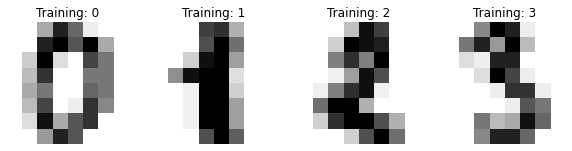

In [8]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Classification

In [9]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

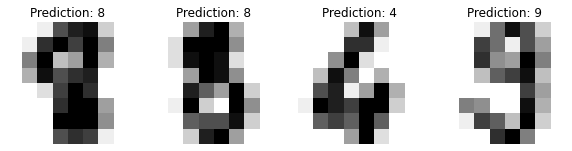

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Take photo

<IPython.core.display.Javascript object>

Saved to photo.jpg


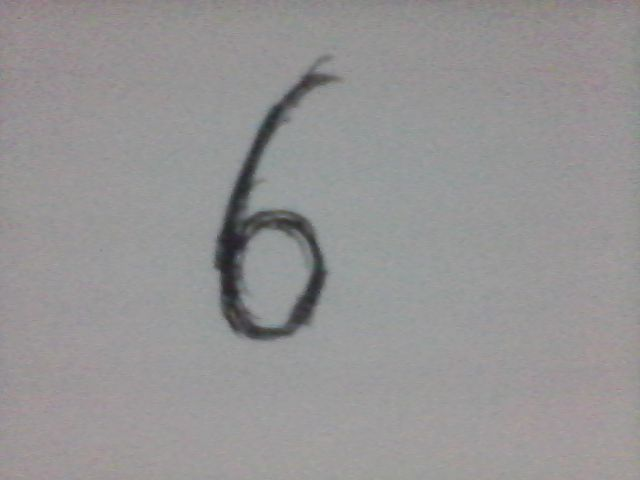

In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#Lưu file photo
_image = filename

Convert Image to matrix

Gray image: 


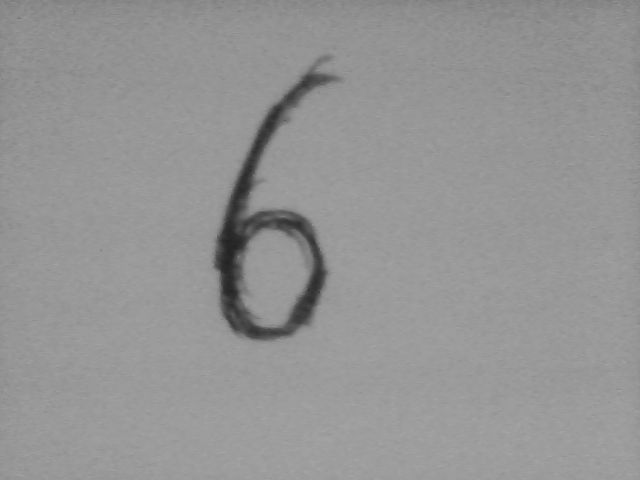

Croppped image: 


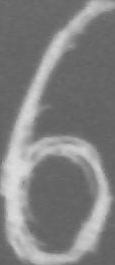

Resized image: 


array([[152, 152, 149, 148, 151, 145, 149, 144],
       [153, 150, 150, 148, 149, 148, 143, 148],
       [151,  78, 128, 152, 151, 149, 149, 146],
       [153,  59, 141, 151, 150, 150, 150, 151],
       [156,  48,  53, 153, 153, 153, 154, 155],
       [155, 150, 152, 152, 150, 150, 150, 151],
       [156,  53, 152, 154, 154, 152, 153, 150],
       [156, 152,  85, 154, 156, 154, 151, 152]], dtype=uint8)

In [12]:
###### Convert image to grayscale 8x8 array
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def crop_img(inImg):
  inImg = 255 - inImg[:, :]

  maxUp = inImg.shape[0]//2
  maxDown = inImg.shape[0]//2
  maxLeft = inImg.shape[1]//2
  maxRight = inImg.shape[1]//2

  for i in range(inImg.shape[0]):
    for j in range(inImg.shape[1]):
      if inImg[i][j] > 160:
        if maxUp >= i: maxUp = i
        if maxDown <= i: maxDown = i
        if maxLeft >= j: maxLeft = j
        if maxRight <= j: maxRight = j

  editedImg = inImg[maxUp:maxDown+1, maxLeft:maxRight+1] 
  return editedImg
  
path_img = "/content/photo.jpg"

gray_image = cv2.imread(path_img, 0) 
print('Gray image: ')
cv2_imshow(gray_image)

croppedImg = crop_img(gray_image)
print('Croppped image: ')
cv2_imshow(croppedImg)


resizedImg =  cv2.resize(img_crop,(8,8))
print('Resized image: ')
cv2_imshow(resizedImg)
resizedImg

Predict number

Text(0.5, 1.0, 'Prediction: [5]')

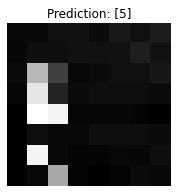

In [13]:
input_data = resizedImg/16
predict_input_data = clf.predict(input_data.reshape(1,64))
_, ax = plt.subplots(figsize=(4, 3))
ax.set_axis_off()
image = resizedImg
ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title(f'Prediction: {predict_input_data}')

# **PHẦN II: Phân tích, hông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi**

Câu 1: Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?



- Kết quả cho ra không được tốt.


Câu 2: Ủa mà nhìn vào đâu để kết luận là tốt hay không?

- Nhìn vào kết quả dự đoán từ quá trình chạy.

Câu 5: Nếu không tốt thì lý do tại sao?

- Có thể do phần hình ảnh Input chưa rõ, chữ viết tay còn quá xấu, thuật toán không nhận dạng được.
- Phần xử lý Input chưa được hoàn thiện, chưa đáp ứng được yêu cầu về Input của bài toán. Cụ thể như các hàm: Crop image, convert image to grayscale, reshape image,...
- Trường hợp chữ quá xấu (mắt người có thể thấy được)nhưng qua phần tiền xử lý hình ảnh chưa được hiệu quả, cho ra data input không phù hợp với tập train
- Có thể Model digit recognition không đủ các kiểu điển hình của chữ viết tay của mọi người, nên trong hầu hết trường hợp không nhận ra được (trừ trường hợp, chữ viết người đó đủ rõ sau khi tiền xử lý có dạng gần giống model) 

Câu 4: Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

- Đối với bài toán nhận dạng chữ viết tay ở trên, vì là chữ viết tay nên mỗi người sẽ có những kiểu viết khác nhau, nên bài toán này có thể cho kết quả không như ý muốn. Đối với một số bài toán phức tạp như nhận dạng biển số nhà,... nếu chữ số trong bảng được in rõ ràng và đạt yêu cầu Input thì có thể sử dụng được. 